<a href="https://colab.research.google.com/github/cgh1992/Rainfall-Prediction-in-Shenzhen/blob/master/CONVLSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
  
import pandas as pd
import numpy as np


In [ ]:
from keras import optimizers  
from keras.models import Sequential
from keras.layers.convolutional import Conv3D
from keras.layers.convolutional_recurrent import ConvLSTM2D
from keras.layers.normalization import BatchNormalization
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
import numpy as np
from sklearn import preprocessing
from keras.layers import Input, Dense, MaxPooling2D, MaxPooling3D, Dropout, BatchNormalization, Flatten, Conv2D, Conv3D, AveragePooling3D, LSTM, Reshape
from sklearn import preprocessing
from keras import metrics

In [ ]:
X = np.load('/content/drive/My Drive/Project/data/train_img_forCNN.npy')
y = np.load('/content/drive/My Drive/Project/data/train_label_forCNN.npy')
X_train = X
del X

In [ ]:
X_train.shape

(8000, 15, 101, 101)

In [ ]:
X_train = X_train.reshape(8000,15,101,101,1)

In [ ]:
index = [i for i in range(len(y))]  
np.random.shuffle(index)

X_train = X_train[index]
y = y[index]

In [ ]:
    model = Sequential()
'''    model.add(AveragePooling3D(pool_size=(1, 4, 4),
                       input_shape=(None,101, 101, 1),
                       padding='same'))
    model.add(BatchNormalization())
    
    model.add(ConvLSTM2D(filters=32, kernel_size=(3, 3),
                       padding='same', return_sequences=True))
    model.add(BatchNormalization())'''
    model.add(ConvLSTM2D(filters=32, kernel_size=(3, 3), input_shape=(None,101,101,1),
                       padding='same', return_sequences=True))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    
    model.add(ConvLSTM2D(filters=32, kernel_size=(3, 3),
                       padding='same', return_sequences=True))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    
    model.add(ConvLSTM2D(filters=32, kernel_size=(3, 3),
                       padding='same', return_sequences=False))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    
    model.add(MaxPooling2D(pool_size=(4, 4), padding='same'))
    model.add(Flatten())
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    
    model.add(Dense(1024, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))
    
    model.add(Dense(512, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))
    
    model.add(Dense(1, activation='linear'))

In [ ]:

model.compile(loss='mean_squared_error', optimizer='adam',metrics=[metrics.mse,metrics.mae])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_lst_m2d (ConvLSTM2D)    (None, None, 101, 101, 32 38144     
_________________________________________________________________
batch_normalization (BatchNo (None, None, 101, 101, 32 128       
_________________________________________________________________
dropout (Dropout)            (None, None, 101, 101, 32 0         
_________________________________________________________________
conv_lst_m2d_1 (ConvLSTM2D)  (None, None, 101, 101, 32 73856     
_________________________________________________________________
batch_normalization_1 (Batch (None, None, 101, 101, 32 128       
_________________________________________________________________
dropout_1 (Dropout)          (None, None, 101, 101, 32 0         
_________________________________________________________________
conv_lst_m2d_2 (ConvLSTM2D)  (None, 101, 101, 32)      7

In [ ]:
his = model.fit(X_train,y,batch_size=16,validation_split=0.2,epochs=20,verbose=1,shuffle=True)

Epoch 1/20
400/400 [==============================] - 491s 1s/step - loss: 312.5988 - mean_squared_error: 312.5988 - mean_absolute_error: 12.8309 - val_loss: 383.7712 - val_mean_squared_error: 383.7712 - val_mean_absolute_error: 14.3826
Epoch 2/20
400/400 [==============================] - 491s 1s/step - loss: 196.5477 - mean_squared_error: 196.5477 - mean_absolute_error: 10.7881 - val_loss: 210.9684 - val_mean_squared_error: 210.9684 - val_mean_absolute_error: 10.9812
Epoch 3/20
400/400 [==============================] - 491s 1s/step - loss: 168.5085 - mean_squared_error: 168.5085 - mean_absolute_error: 9.9023 - val_loss: 201.1594 - val_mean_squared_error: 201.1594 - val_mean_absolute_error: 10.5304
Epoch 4/20
400/400 [==============================] - 491s 1s/step - loss: 142.8019 - mean_squared_error: 142.8019 - mean_absolute_error: 9.0281 - val_loss: 180.1856 - val_mean_squared_error: 180.1856 - val_mean_absolute_error: 10.4578
Epoch 5/20
400/400 [==============================] - 

In [ ]:
del X_train,y


In [ ]:
np.save('/content/drive/My Drive/Project/model_epoch20_batchsize16_ConvLSTM.npy',his.history)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
    mse         = his.history['mean_squared_error']
    mae         = his.history['mean_absolute_error']
    val_mse     = his.history['val_mean_squared_error']
    val_mae     = his.history['val_mean_absolute_error']
    epochs       = range(len(mse))
    nb_epochs    = len(epochs)
    
    epochs


range(0, 20)

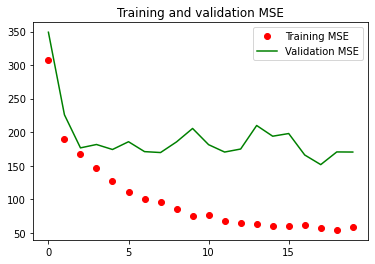

In [ ]:
    
    f2 = plt.figure(2)
  
    #plt.axis(np.arange(0,nb_epochs,1))
    plt.xticks(np.arange(0,nb_epochs,5))
    plt.plot(epochs, mse, 'ro', label='Training MSE')
    #plt.plot(epochs, mae, 'r--', label='Training MAE')
    plt.plot(epochs, val_mse, 'g-', label='Validation MSE')
    #plt.plot(epochs, val_mae, 'g^', label='Validation MAE')
    plt.title('Training and validation MSE')
    plt.legend()
    #plt.draw()
    plt.pause(0.001)
    plt.show()

In [ ]:

X_test = np.load('/content/drive/My Drive/Project/test_img.npy')
y_test = np.load('/content/drive/My Drive/Project/test_label.npy')
#X_test = X_test[:,:,3,:]


In [ ]:
X_test = X_test.reshape(2000,15,101,101,1)

In [ ]:
re = model.evaluate(X_test,y_test)

63/63 [==============================] - 38s 611ms/step - loss: 147.7165 - mean_squared_error: 147.7165 - mean_absolute_error: 8.9494


In [ ]:
re

[147.71649169921875, 147.71649169921875, 8.949355125427246]

In [ ]:
y_pre = model.predict(X_test)